### Downloading and Importing the required packages

In [1]:
!pip3 install --upgrade pip
!pip install xlrd

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Config
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")
%matplotlib inline

### Loading Dataset

In [3]:
file_path = "../data/raw/UCI_Credit_Card.xls"  # Adjust if needed
df_raw = pd.read_excel(file_path)

# Take first row as header
new_header = df_raw.iloc[0]     # first row as header
df = df_raw[1:].copy()          # data without first row
df.columns = new_header         # assign column names

# Reset index and ensure clean data types
df.reset_index(drop=True, inplace=True)
df = df.apply(pd.to_numeric, errors='coerce')  # Convert all to numeric (if applicable)

print("✅ Dataset shape after fixing headers:", df.shape)
df.head()

✅ Dataset shape after fixing headers: (30000, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [11]:
# Basic Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [12]:
# Unique values per column
df.nunique()

0
ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64

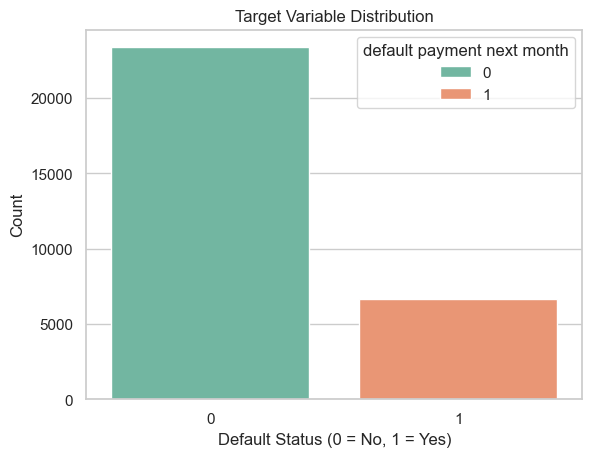

default payment next month
0    0.7788
1    0.2212
Name: proportion, dtype: float64

In [21]:
# Target Variable Distribution
# Target: default.payment.next.month (0 = No Default, 1 = Default)

sns.countplot(x='default payment next month', data=df, palette='Set2', hue='default payment next month', legend='auto')
plt.title("Target Variable Distribution")
plt.xlabel("Default Status (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

df['default payment next month'].value_counts(normalize=True)

'''
counts = df['default_payment_next_month'].value_counts()
percentages = df['default_payment_next_month'].value_counts(normalize=True) * 100

print("Class distribution:\n", counts)
print("Class percentages:\n", percentages)
'''

'''
FOR MODEL TRAINING DATA IS PREPARED
from sklearn.model_selection import train_test_split

X = df.drop(columns=['default_payment_next_month'])
y = df['default_payment_next_month']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Preserves class balance
)
'''

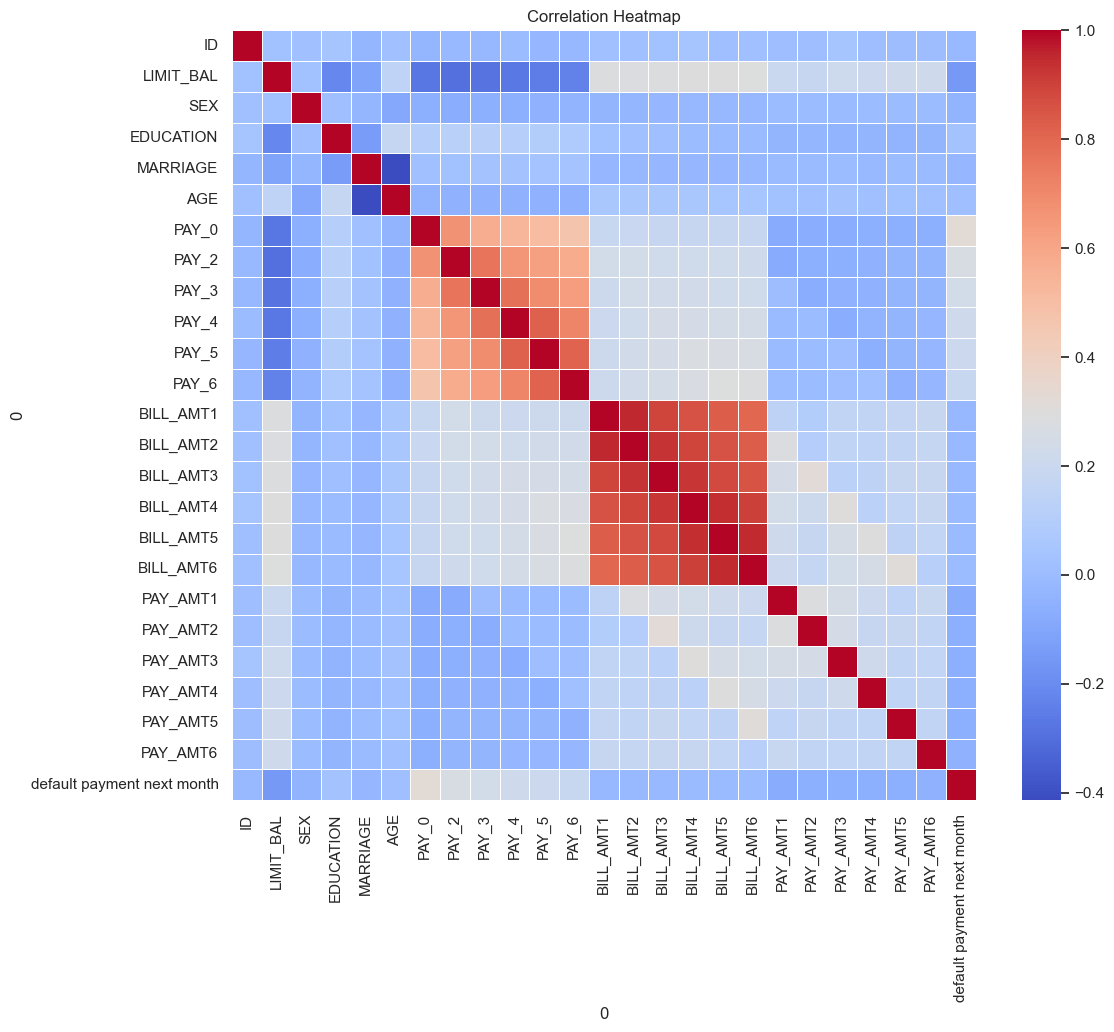

In [17]:
# Correlation Heatmap (Numerical Features)
plt.figure(figsize=(12, 10))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

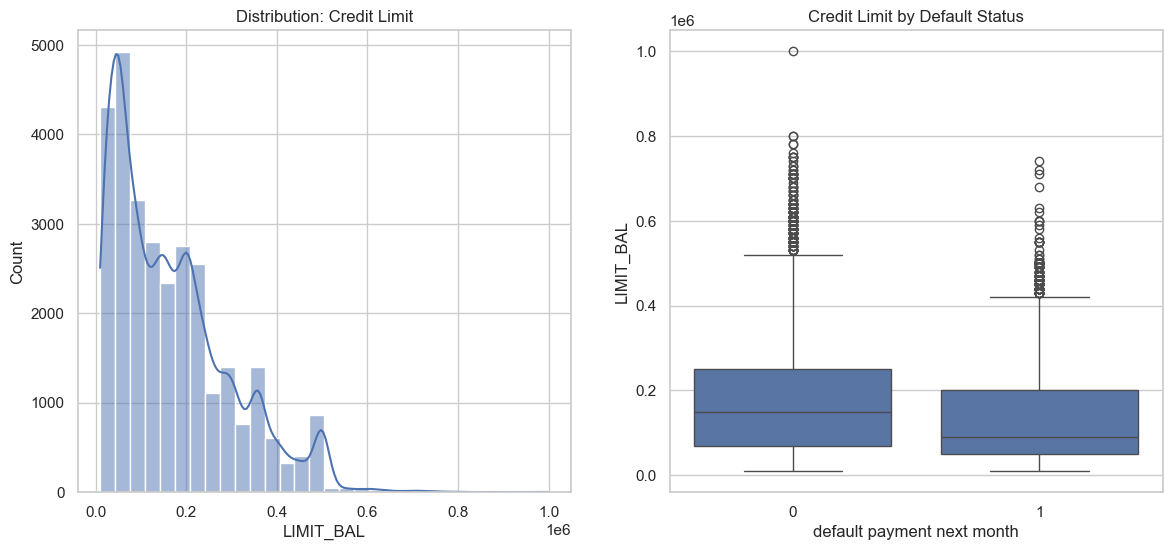

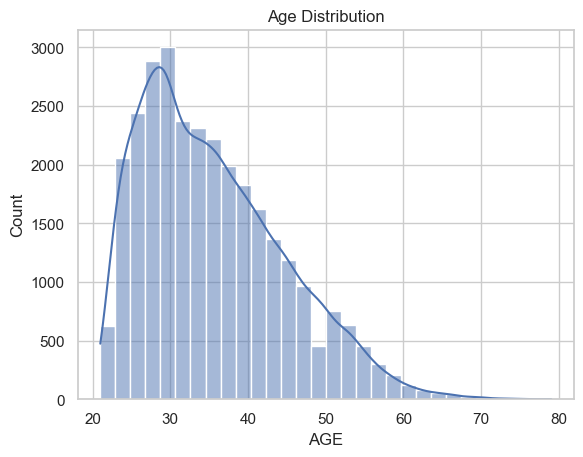

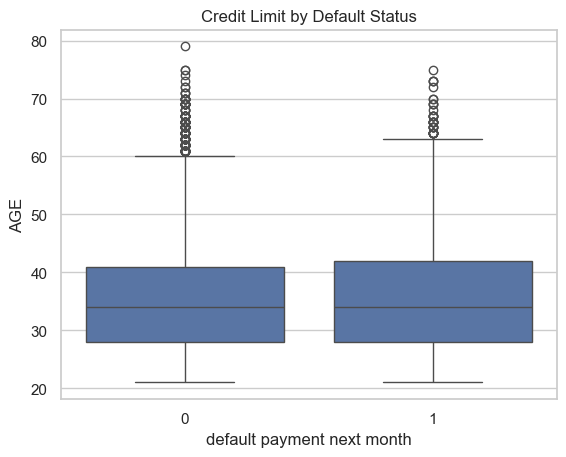

In [31]:
# Feature Distributions (LIMIT_BAL, AGE)
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['LIMIT_BAL'], kde=True, bins=30)
plt.title("Distribution: Credit Limit")

plt.subplot(1, 2, 2)
sns.boxplot(x='default payment next month', y='LIMIT_BAL', data=df)
plt.title("Credit Limit by Default Status")
plt.show()

# Similarly for AGE
sns.histplot(df['AGE'], kde=True, bins=30)
plt.title("Age Distribution")
plt.show()

sns.boxplot(x='default payment next month', y='AGE', data=df)
plt.title("Credit Limit by Default Status")
plt.show()

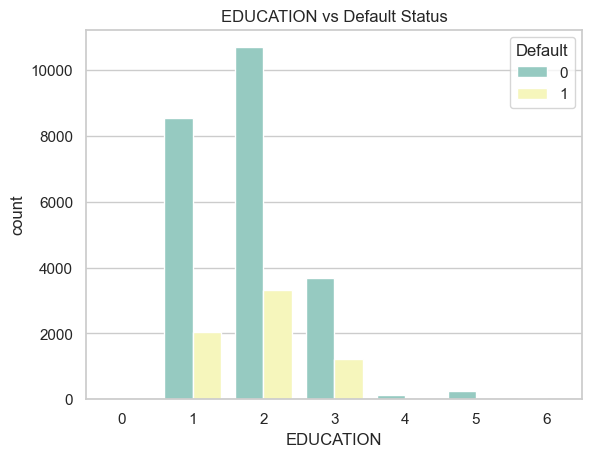

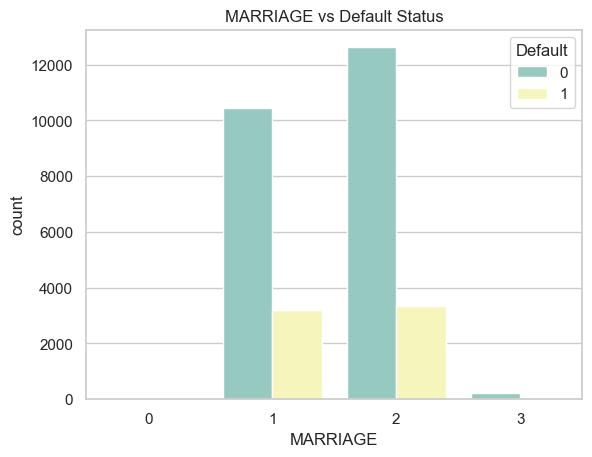

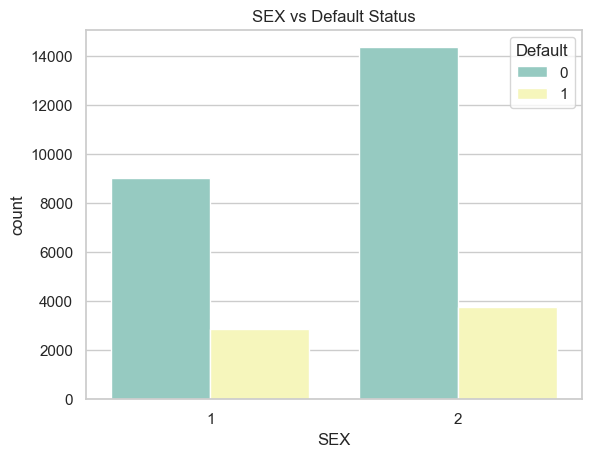

In [5]:
# Categorical Variables (Education, Marital Status)
# Education: (1 = graduate school; 2 = university; 3 = high school; 4 = others)
# Marital Status: (1 = married; 2 = single; 3 = others)
# Sex: (1 = male; 2 = female)

cat_vars = ['EDUCATION', 'MARRIAGE', 'SEX']

for col in cat_vars:
    sns.countplot(x=col, data=df, hue='default payment next month', palette='Set3')
    plt.title(f"{col} vs Default Status")
    plt.legend(title='Default')
    plt.show()

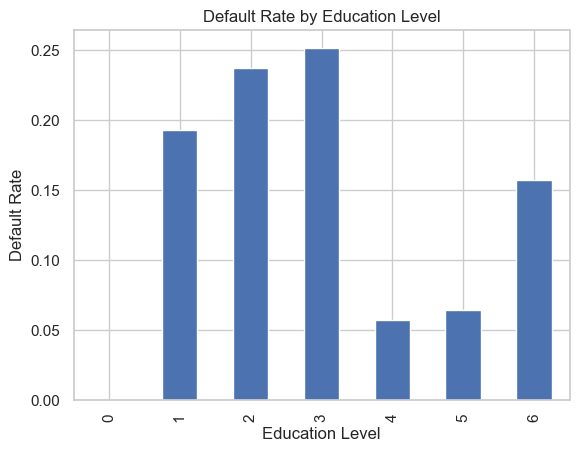

In [10]:
# Education: (1 = graduate school; 2 = university; 3 = high school; 4 = others)
# Education default rate
edu_default_rate = df.groupby('EDUCATION')['default payment next month'].mean()
edu_default_rate.plot(kind='bar', title='Default Rate by Education Level', ylabel='Default Rate', xlabel='Education Level')
plt.show()

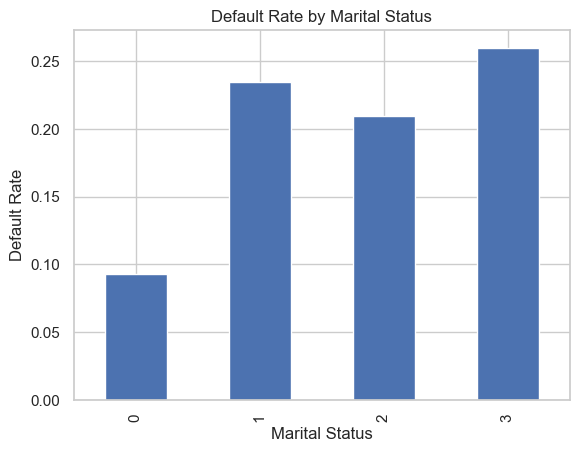

In [8]:
# Marital Status: (1 = married; 2 = single; 3 = others)
# Marital Status default rate
marital_default_rate = df.groupby('MARRIAGE')['default payment next month'].mean()
marital_default_rate.plot(kind='bar', title='Default Rate by Marital Status', ylabel='Default Rate', xlabel='Marital Status')
plt.show()

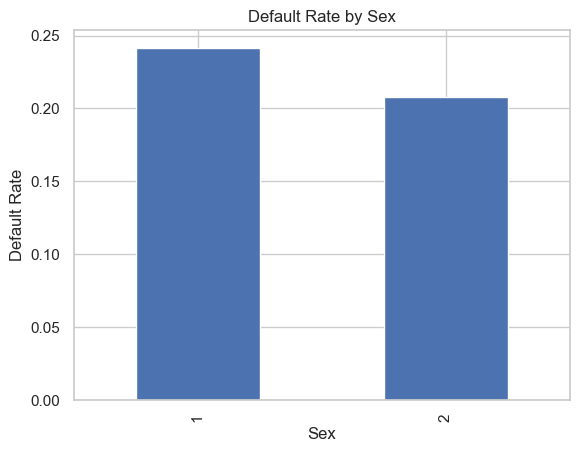

In [9]:
# Sex: (1 = male; 2 = female)
# Sex default rate
sex_default_rate = df.groupby('SEX')['default payment next month'].mean()
sex_default_rate.plot(kind='bar', title='Default Rate by Sex', ylabel='Default Rate', xlabel='Sex')
plt.show()